<a href="https://colab.research.google.com/github/Tamilarasanbass173/Zomato_Data_Analysis-Project/blob/main/Zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

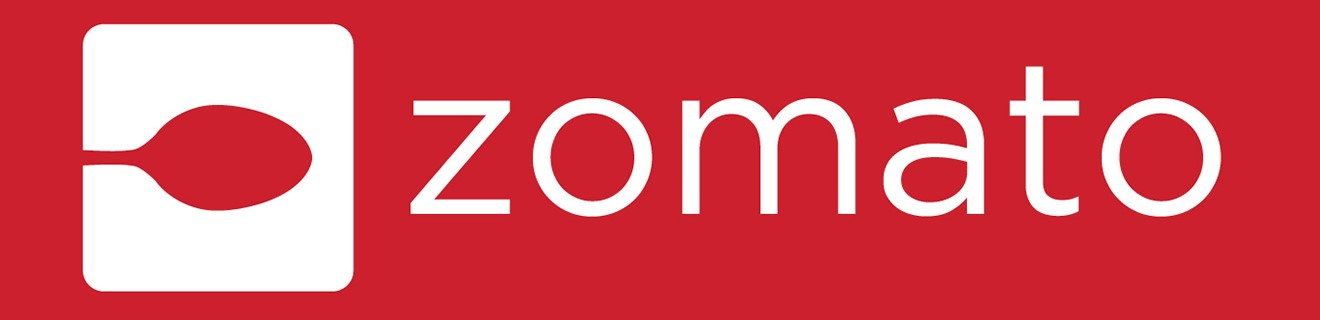

# ZOMATO RESTAURANT DATA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('zomato_rest_data.xlsx')
df

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# DATA CLEANING

In [ ]:
#Removing unwanted columns
col=['Unnamed: 0','url','address','phone','dish_liked','reviews_list','menu_item','listed_in(city)']
df.drop(col,axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
#Renaming the columns
df.rename(columns={'approx_cost(for two people)':'costfor2','listed_in(type)':'type'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)

**cleaning rate column**

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Replacing 'NEW', '-' with Nan
out=[]
for i in df['rate']:
  if i=='NEW' or i=='-':
    out.append(np.nan)
  else:
    out.append(i)
df['rate']=out
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Removing '/5' in rate column and converting rate into float.
out=[]
for i in df['rate']:
  if i==np.nan:
    out.append(i)
  else:
    v=str(i).split('/')[0]
    out.append(float(v))
df['rate']=out
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
# Filling nan value in rate col with mean
df['rate']=df['rate'].fillna(round(df['rate'].mean()))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35011 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          35011 non-null  object 
 1   online_order  35011 non-null  object 
 2   book_table    35011 non-null  object 
 3   rate          35011 non-null  float64
 4   votes         35011 non-null  int64  
 5   location      34997 non-null  object 
 6   rest_type     34855 non-null  object 
 7   cuisines      34978 non-null  object 
 8   costfor2      34790 non-null  object 
 9   type          35011 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


**Handling location column**

In [ ]:
#Making the locations less than 300 into others category
loc=df['location'].value_counts()
locless300=loc[loc<300]

out=[]
for i in df['location']:
  if i in locless300:
    out.append('others')
  else:
    out.append(i)

df['location']=out
df['location'].value_counts()

,count
location,
others,4885
BTM,2514
Whitefield,1972
Indiranagar,1789
HSR,1769
Marathahalli,1683
Koramangala 5th Block,1615
JP Nagar,1411
Jayanagar,1248


In [ ]:
#Dropping  nan values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34636 non-null  object 
 1   online_order  34636 non-null  object 
 2   book_table    34636 non-null  object 
 3   rate          34636 non-null  float64
 4   votes         34636 non-null  int64  
 5   location      34636 non-null  object 
 6   rest_type     34636 non-null  object 
 7   cuisines      34636 non-null  object 
 8   costfor2      34636 non-null  object 
 9   type          34636 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


**Handling rest_type column**

In [ ]:
#Making rest_type less than 1000 into others category
rest=df['rest_type'].value_counts()
restlessthan1000=rest[rest<1000]

out=[]
for i in df['rest_type']:
  if i in restlessthan1000:
    out.append('others')
  else:
    out.append(i)
df['rest_type']=out
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,12123
others,8193
Casual Dining,7533
Cafe,2578
Delivery,1502
Dessert Parlor,1491
"Takeaway, Delivery",1216


**Handling cuisines column**

In [ ]:
# Making cuisines less than 300 into others category
cui=df['cuisines'].value_counts()
cuilessthan300=cui[cui<300]

out=[]
for i in df['cuisines']:
  if i in cuilessthan300:
    out.append('others')
  else:
    out.append(i)
df['cuisines']=out
df['cuisines'].value_counts()

,count
cuisines,
others,25980
North Indian,1895
"North Indian, Chinese",1561
South Indian,1172
"Bakery, Desserts",591
Biryani,557
Fast Food,485
"South Indian, North Indian, Chinese",475
Cafe,447


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34636 non-null  object 
 1   online_order  34636 non-null  object 
 2   book_table    34636 non-null  object 
 3   rate          34636 non-null  float64
 4   votes         34636 non-null  int64  
 5   location      34636 non-null  object 
 6   rest_type     34636 non-null  object 
 7   cuisines      34636 non-null  object 
 8   costfor2      34636 non-null  object 
 9   type          34636 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


**cleaning costfor2 column**

In [ ]:
df['costfor2']=df['costfor2'].str.replace(',','')
df['costfor2']=df['costfor2'].astype(int)
df['costfor2'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140])

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,others,300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


In [ ]:
#Resetting the index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,others,300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet
...,...,...,...,...,...,...,...,...,...,...
34631,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,others,others,1500,Pubs and bars
34632,Vinod Bar And Restaurant,No,No,4.0,0,Whitefield,others,others,600,Pubs and bars
34633,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,4.0,0,Whitefield,others,others,2000,Pubs and bars
34634,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,others,others,others,2500,Pubs and bars


# DATA VISUALIZATION

In [ ]:
#COLOR CODES
zomato_colors=sns.color_palette(['#CB202D','#2D2D2D'])

#data label
def data_label(a):
  for i in a.containers:
    a.bar_label(i,label_type='center',color='white')

**count of online order and book_table columns**

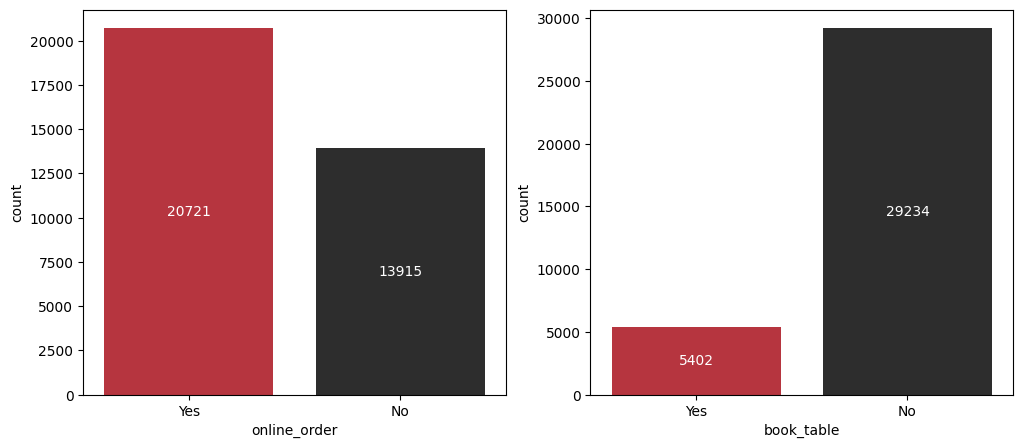

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
a=sns.countplot(x='online_order',data=df,hue='online_order',palette=zomato_colors,ax=axes[0])
data_label(a)
b=sns.countplot(x='book_table',data=df,hue='book_table',palette=zomato_colors,ax=axes[1])
data_label(b)

**Restaurants with online order facility are more.
Restaurants without book table facility are more.**

**Analysing the rating of online order and book table facility**

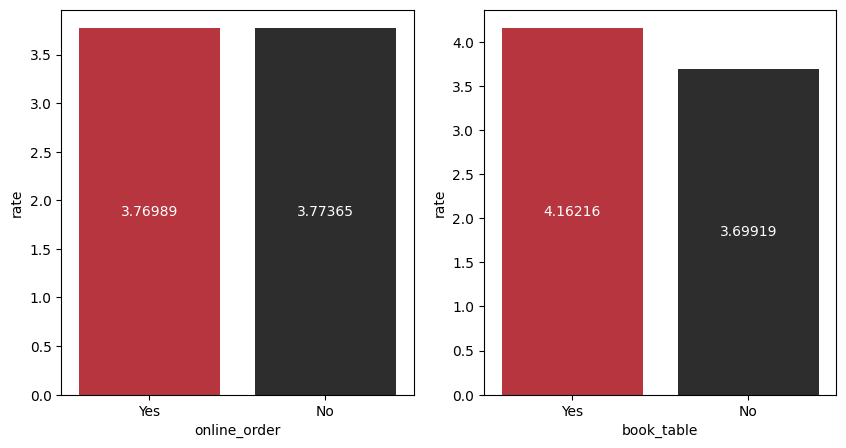

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

a=sns.barplot(x='online_order',y='rate',data=df,hue='online_order',palette=zomato_colors,errorbar=None,ax=axes[0])
data_label(a)
b=sns.barplot(x='book_table',y='rate',data=df,hue='book_table',palette=zomato_colors,errorbar=None,ax=axes[1])
data_label(b)


**For online order facility rating is almost same.
Restaurants which are providing book table facility are having highest rating.**

**Analysing online order and book table by votes**

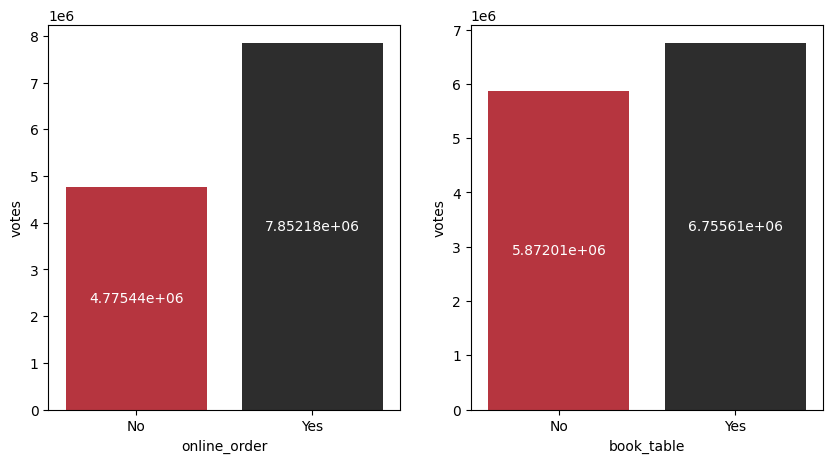

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

v=df.groupby('online_order')['votes'].sum()
v1=df.groupby('book_table')['votes'].sum()
v=pd.DataFrame(v)
v1=pd.DataFrame(v1)
a=sns.barplot(x='online_order',y='votes',data=v,hue='online_order',palette=zomato_colors,ax=axes[0])
b=sns.barplot(x='book_table',y='votes',data=v1,hue='book_table',palette=zomato_colors,ax=axes[1])
data_label(a)
data_label(b)

**People are Interested on restaurants which are providing online order and book table facility.**

# Analysing location by online order and book table

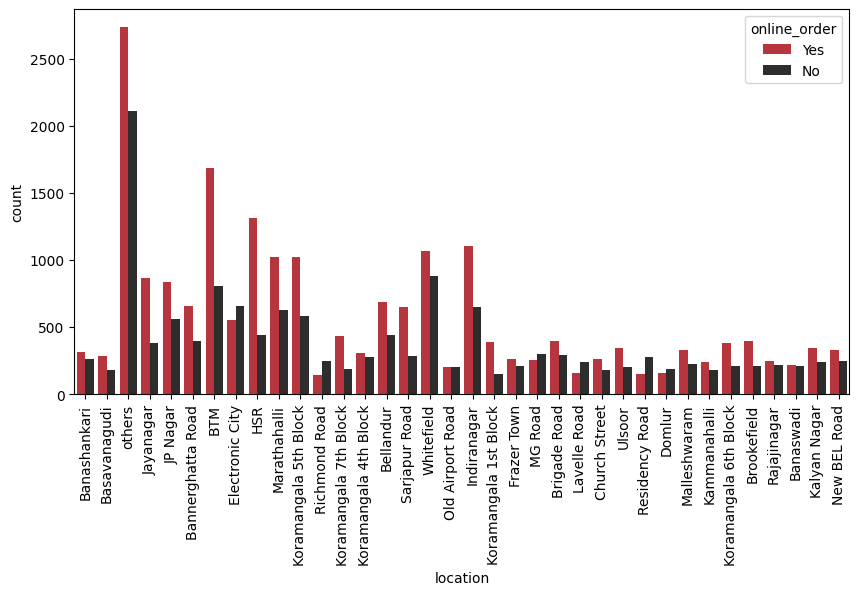

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='location',data=df,hue='online_order',palette=zomato_colors)
plt.xticks(rotation=90)
plt.show()

**In locations such as Richmond road,Lavelle Road, Residency Road, and Domlur online order facility is less.**

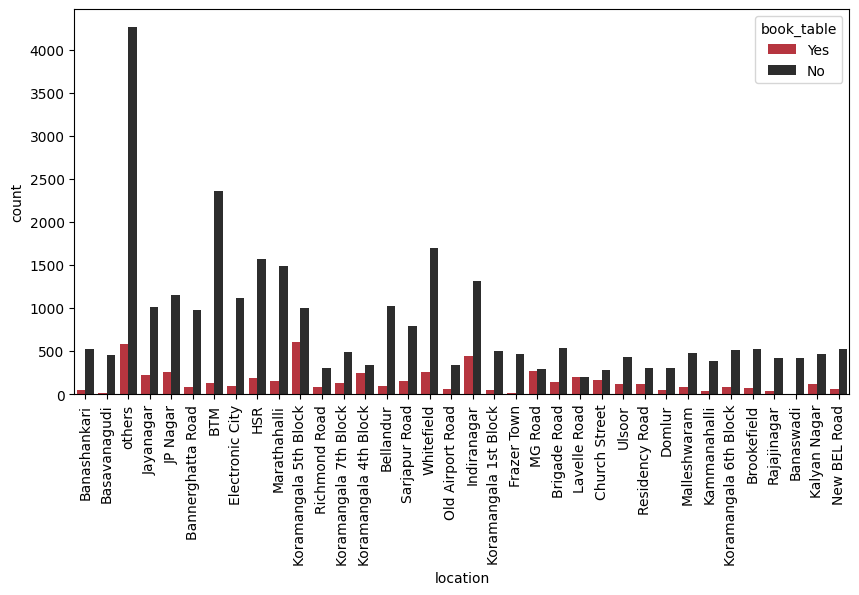

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='location',data=df,hue='book_table',palette=zomato_colors)
plt.xticks(rotation=90)
plt.show()

**Restaurants in all locations are not providing book table facility.**

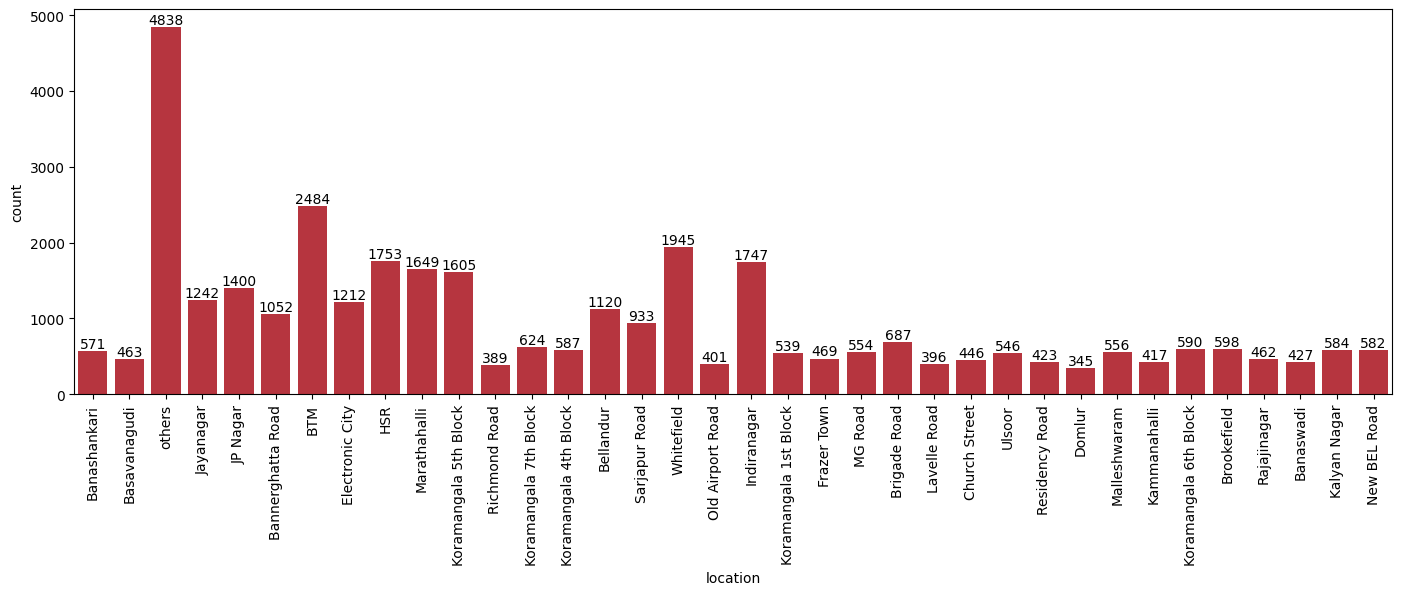

In [ ]:
plt.figure(figsize=(17,5))
a=sns.countplot(x='location',data=df,color='#CB202D')
for i in a.containers:
  a.bar_label(i)
plt.xticks(rotation=90)
plt.show()

**Restaurants in Richmond road, old airport road, Lavelle road, and Domlur are less compared to other locations.**

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costfor2,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,others,300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


# Analysing Rest type column

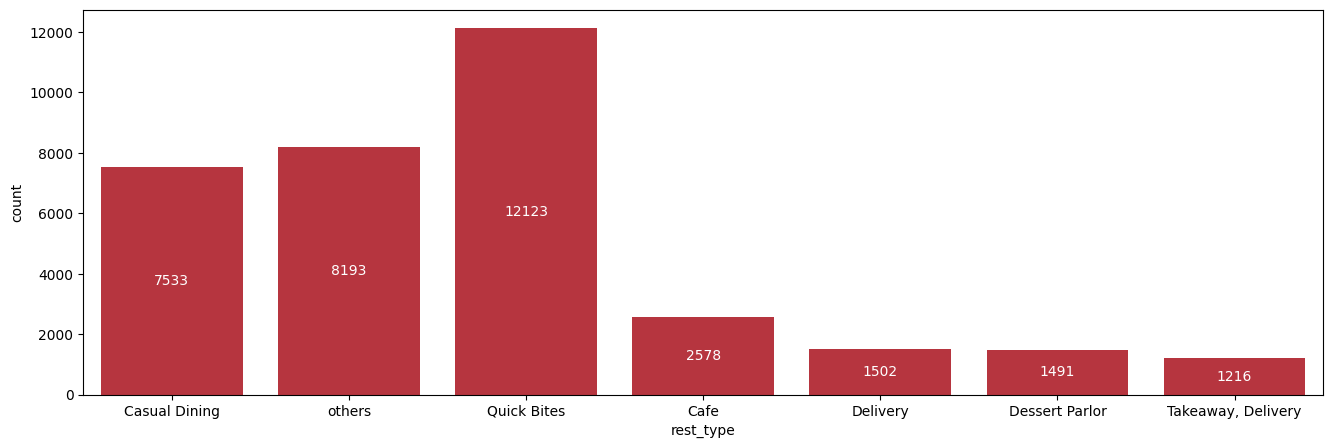

In [ ]:
plt.figure(figsize=(16,5))
a=sns.countplot(x='rest_type',data=df,color='#CB202D')
data_label(a)

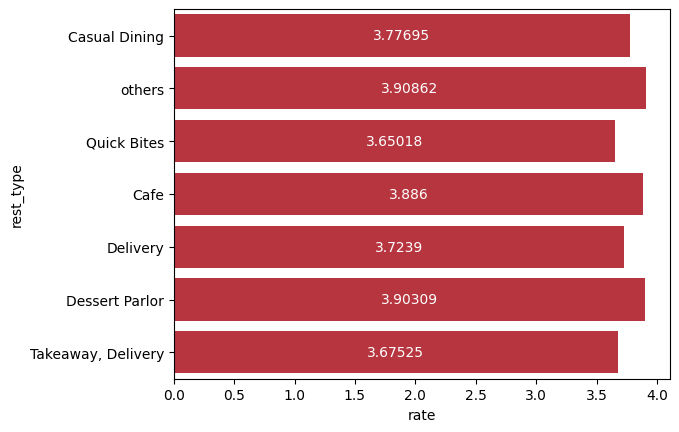

In [ ]:
a=sns.barplot(y='rest_type',x='rate',data=df,color='#CB202D',errorbar=None)
data_label(a)

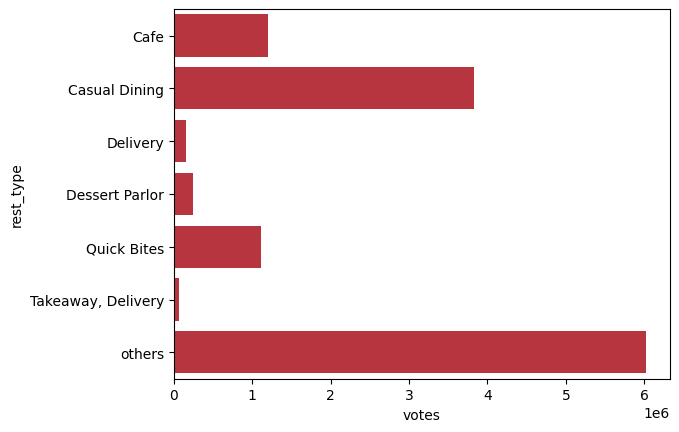

In [ ]:
v=df.groupby('rest_type')['votes'].sum()
v=pd.DataFrame(v)
a=sns.barplot(y='rest_type',x='votes',data=v,color='#CB202D')

**People are liking the rest types such as cafe, casual dining, quick bites.**

**Analysing cuisines column**

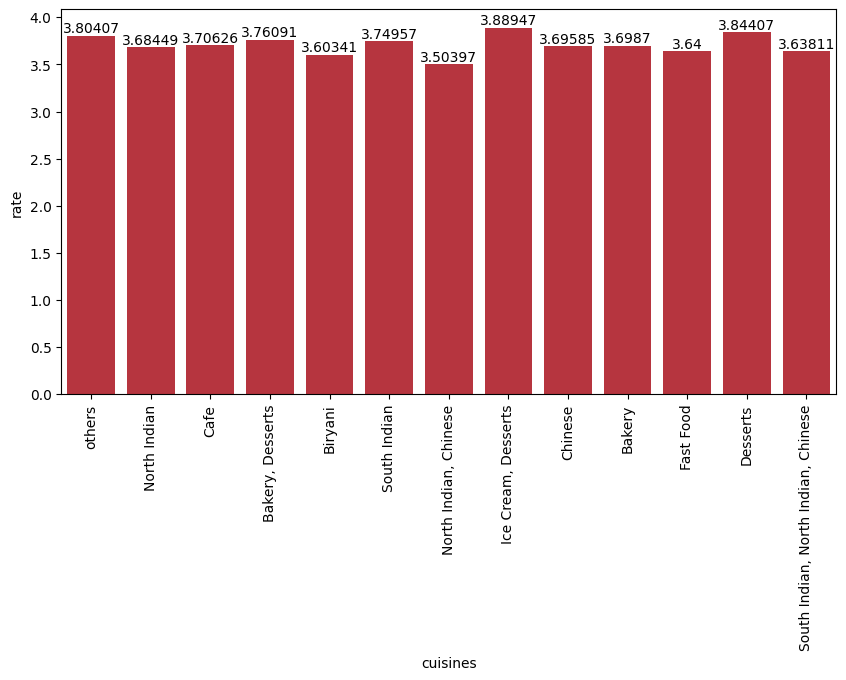

In [ ]:
plt.figure(figsize=(10,5))
a=sns.barplot(x='cuisines',y='rate',data=df,color='#CB202D',errorbar=None)
plt.xticks(rotation=90)
for i in a.containers:
  a.bar_label(i)

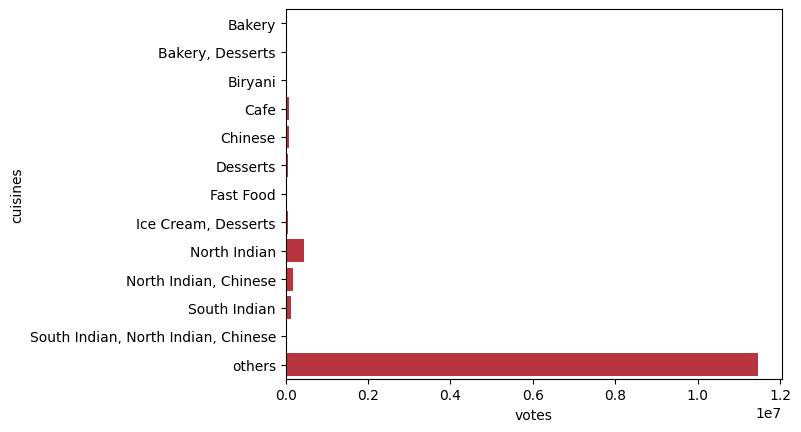

In [ ]:
v=df.groupby('cuisines')['votes'].sum()
v=pd.DataFrame(v)
a=sns.barplot(y='cuisines',x='votes',data=v,color='#CB202D')

**People's interest is more for North indian, chinese, south indian, icecream and desserts.**

# Analysing type column

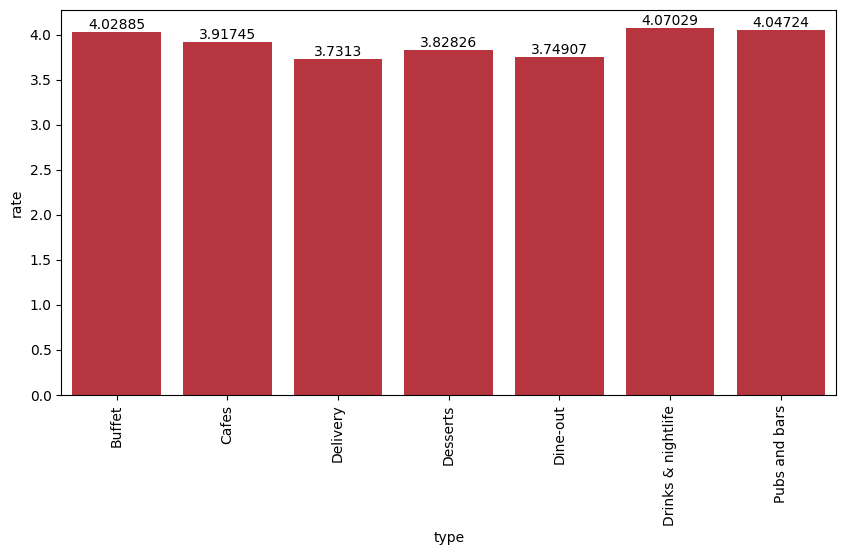

In [ ]:
plt.figure(figsize=(10,5))
a=sns.barplot(x='type',y='rate',data=df,color='#CB202D',errorbar=None)
plt.xticks(rotation=90)
for i in a.containers:
  a.bar_label(i)

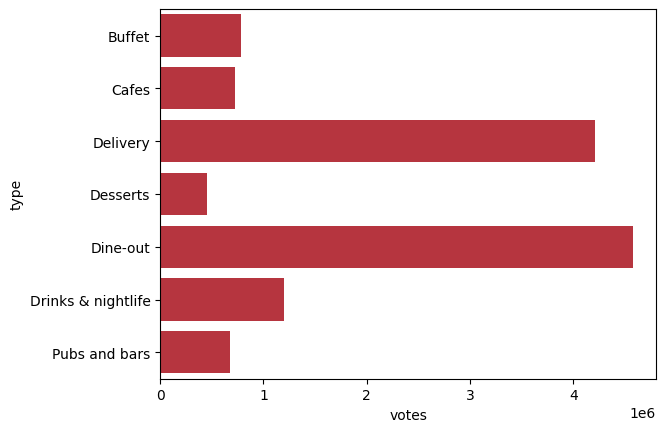

In [ ]:
v=df.groupby('type')['votes'].sum()
v=pd.DataFrame(v)
a=sns.barplot(y='type',x='votes',data=v,color='#CB202D')

**For Drinks and night life , pubs and bars, buffet rating is more.
No.of votes for Delivery and Dineout are more.**

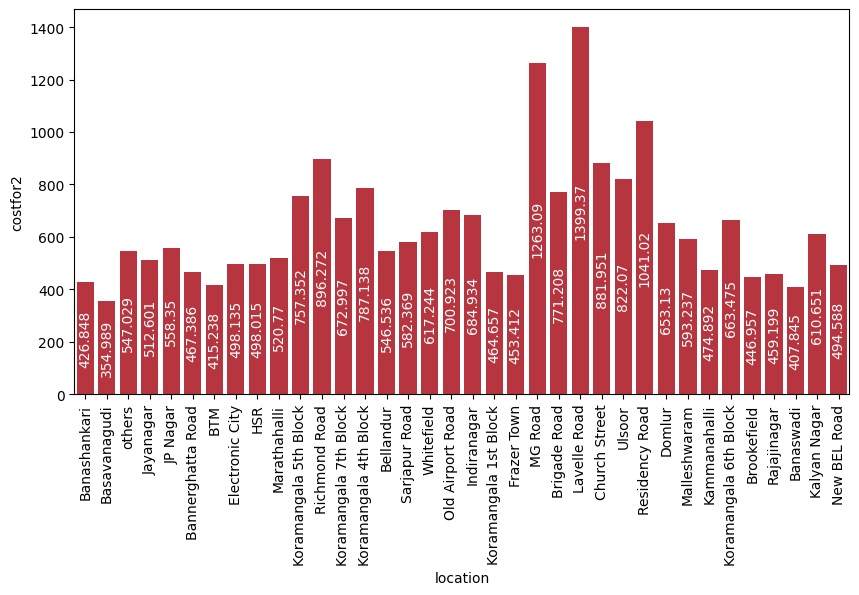

In [ ]:
plt.figure(figsize=(10,5))
a=sns.barplot(x='location',y='costfor2',data=df,color='#CB202D',errorbar=None)
for i in a.containers:
  a.bar_label(i,label_type='center',color='white',rotation=90)
plt.xticks(rotation=90)
plt.show()

**Most of the restaurants are charging 595 Rs on an average for 2 people.**

# Final Conclusion:

# 1.Restaurants with online order facility are more. Restaurants without book table facility are more.

# 2.For online order facility rating is almost same. Restaurants which are providing book table facility are having highest rating.

# 3.People are Interested on restaurants which are providing online order and book table facility.

# 4.In locations such as Richmond road,Lavelle Road, Residency Road, and Domlur online order facility is less.

# 5.Restaurants in all locations are not providing book table facility.

# 6.Restaurants in Richmond road, old airport road, Lavelle road, and Domlur are less compared to other locations.

# 7.People are liking the rest types such as cafe, casual dining, quick bites.

# 8.People's interest is more for North indian, chinese, south indian, icecream and desserts.

# 9.For Drinks and night life , pubs and bars, buffet rating is more. No.of votes for Delivery and Dineout are more.

# 10.Most of the restaurants are charging 595 Rs on an average for 2 people.